[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Computational_Statistics/blob/main/11/ALE.ipynb)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
import requests
import pandas as pd

In [23]:
def download_data():  ### This dude will download the dataset from the directory directly!
  url = "https://raw.githubusercontent.com/y-akbal/Computational_Statistics/main/11/dataset.csv"
  res = requests.get(url, allow_redirects=True)
  with open('dataset.csv','wb') as file:
    file.write(res.content)
download_data()

In [24]:
dataset = pd.read_csv("dataset.csv")[: 100]

**bold text**## Some Exploratory Data Analysis

In [25]:
## What is the average citric acidity?
## What is the maximum citric acidity obverved?
## What is the average density?

average_citric_acidity = dataset['citric acid'].mean()
print("\nAverage citric acidity:", average_citric_acidity)

max_citric_acidity = dataset['citric acid'].max()
print("Maximum citric acidity observed:", max_citric_acidity)

average_density = dataset['density'].mean()
print("Average density:", average_density)


Average citric acidity: 0.2539
Maximum citric acidity observed: 0.73
Average density: 0.9968819999999999


[link text](https://)# Bootstrap Questions


In [26]:
## A researcher wants to find out a possible correlation between citric acid and density of some wine samples
## 1) What is the correlation between these two features?
## 2) What is the bootstrap standard error that you make in calculating this error?
## 3) What do you think about a possible bias in your estimation? overestimate or underestimate?

correlation = dataset['citric acid'].corr(dataset['density'])
print(f"Correlation: {correlation}")


def bootstrap_standard_error(data1, data2, num_iterations=1000):
    correlations = []
    for _ in range(num_iterations):
        indices = np.random.choice(len(data1), len(data1), replace=True)
        sample_data1 = data1[indices]
        sample_data2 = data2[indices]
        correlation = np.corrcoef(sample_data1, sample_data2)[0, 1]
        correlations.append(correlation)
    return np.std(correlations)

bootstrap_error = bootstrap_standard_error(dataset['citric acid'], dataset['density'])
print(f"Bootstrap Standard Error: {bootstrap_error}")

bootstrap_bias = np.mean(bootstrap_corr_values) - correlation
print("Bias in estimation:", bootstrap_bias)

# 3) What do you think about a possible bias in your estimation? overestimate or underestimate?
# Answer:
# Correlation is 0.45 and confidence interval is [0.31252728427494125, 0.590256588106285]
# So, it's neither overestimated nor underestimated

#In addition to calculate the correlation coefficient, code below is used:

# correlation = 0.45139193619061313 ##come from the output of code above
# bootstrap_se = 0.0708493122018734 ##come from the output of code above
# confidence_interval = [correlation - 1.96 * bootstrap_se, correlation + 1.96 * bootstrap_se]
# print(confidence_interval)

Correlation: 0.45139193619061313
Bootstrap Standard Error: 0.0697283821953742
Bias in estimation: -0.44667205042616953


## Jackknife Questions:

In [27]:
## 1) What is the Jackknife standard error that you make in calculating this error?
## 2) What do you think about a possible bias in your estimation? overestimate or underestimate?


def jackknife_standard_error(data1, data2):
    n = len(data1)
    correlations = []

    for i in range(n):
        idx = np.arange(n) != i
        correlation = np.corrcoef(data1[idx], data2[idx])[0, 1]
        correlations.append(correlation)

    return np.sqrt((n - 1) * np.var(correlations, ddof=1))

jackknife_error = jackknife_standard_error(dataset['citric acid'], dataset['density'])
print(f"Jackknife Standard Error: {jackknife_error}")


jackknife_bias = np.mean(jackknife_error) - correlation
print("Bias in estimation:", jackknife_bias)


Jackknife Standard Error: 0.07093253286518518
Bias in estimation: -0.38045940332542794


# Quality of Wine is Determined by the following farmula:
# A = 0.06*fixed acidity -0.08*volatile acidity + 0.36*citric acid 	-0.02*residual sugar +1.75*chlorides -0.0003*free sulfur dioxide 	-0.004*total sulfur dioxide 	-29.5*density 	0.73*pH 	1.21*sulphates + 0.27*Alcohol + 28.6714363881711

# According to this formula which wine is better?
# What is the average quality?


In [28]:
def predict_func(row):
    return (
        0.06 * row['fixed acidity'] - 0.08 * row['volatile acidity'] +
        0.36 * row['citric acid'] - 0.02 * row['residual sugar'] +
        1.75 * row['chlorides'] - 0.0003 * row['free sulfur dioxide'] -
        0.004 * row['total sulfur dioxide'] - 29.5 * row['density'] +
        0.73 * row['pH'] + 1.21 * row['sulphates'] + 0.27 * row['alcohol'] +
        28.6714363881711
    )

dataset['predicted_quality'] = dataset.apply(predict_func, axis=1)

best_wine_index = dataset['predicted_quality'].idxmax()
best_wine_quality = dataset.loc[best_wine_index, 'predicted_quality']
print(f"The wine with index {best_wine_index} is predicted to be the best with a quality of {best_wine_quality}.")

average_quality = dataset['predicted_quality'].mean()
print(f"The average predicted quality of the wines is {average_quality}.")


The wine with index 19 is predicted to be the best with a quality of 6.745736388171096.
The average predicted quality of the wines is 5.665683388171098.


# Do some bootstrap to see how quality as a measurement is like to distribute. Sketch some histograms. (Refer 10th week on github)


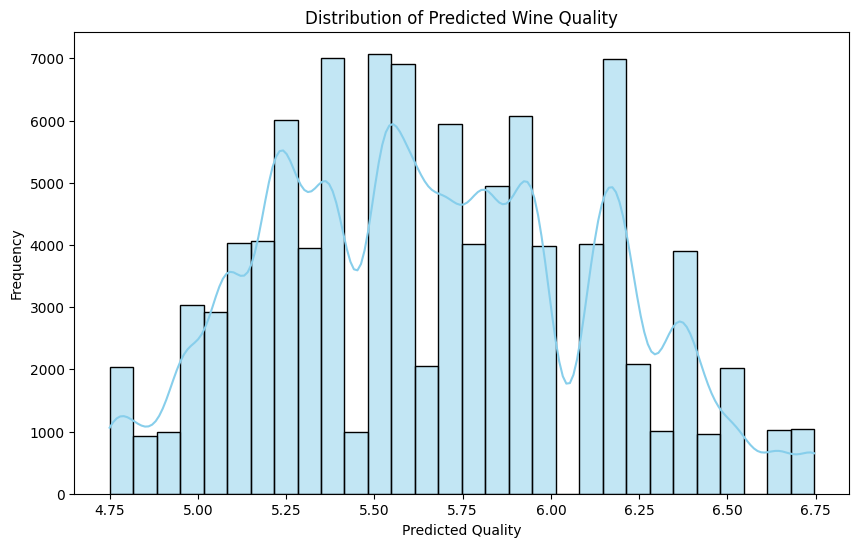

In [29]:
import seaborn as sns

num_bootstrap_samples = 1000

def bootstrap_quality(data, num_samples=num_bootstrap_samples):
    quality_samples = []
    for _ in range(num_samples):
        bootstrap_sample = data['predicted_quality'].sample(frac=1, replace=True)
        quality_samples.extend(bootstrap_sample)
    return quality_samples

quality_samples = bootstrap_quality(dataset)

plt.figure(figsize=(10, 6))
sns.histplot(quality_samples, kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Wine Quality')
plt.xlabel('Predicted Quality')
plt.ylabel('Frequency')
plt.show()




```
# This is formatted as code
```

What is the bootstrap standard error estimation?

In [30]:
bootstrap_mean_samples = [np.mean(np.random.choice(quality_samples, len(quality_samples))) for _ in range(num_bootstrap_samples)]
bootstrap_standard_error = np.std(bootstrap_mean_samples, ddof=1)

print(f"Bootstrap Standard Error of Predicted Wine Quality: {bootstrap_standard_error}")


Bootstrap Standard Error of Predicted Wine Quality: 0.0014260482872564648
